# Problem Statement:- 

-- model should able to predict sales based on spent on advertisment such as TV, Radio, Newspapaer

In [1]:
# Importing Libararies

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

%matplotlib inline

In [3]:
# path of file
path = r"C:\Users\javed.s\Desktop\Rough\d\advertisment.xlsx"

In [4]:
# loading Datasets
df = pd.read_excel(path)

In [5]:
# display data
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
# checking shape
df.shape

(200, 4)

In [9]:
# checking dtypes
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [10]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
# checking duplicate records
df.duplicated().sum()

0

In [12]:
# checking nunique categories
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [13]:
# checking missing records
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
# Basic EDA
# Univariate

count    200.00
mean      14.02
std        5.22
min        1.60
25%       10.38
50%       12.90
75%       17.40
max       27.00
Name: Sales, dtype: float64


Text(0.5, 1.0, 'Sales')

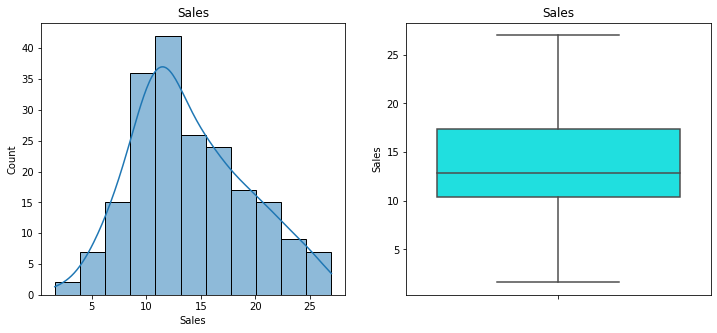

In [35]:
print(df['Sales'].describe().round(2))


fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize = (12,5))
sns.histplot(x = 'Sales', data = df, kde = True, ax = axes[0])
axes[0].set_title('Sales')

sns.boxplot(y = 'Sales', data = df, color = 'cyan',ax = axes[1])
axes[1].set_title('Sales')


count    200.00
mean     147.04
std       85.85
min        0.70
25%       74.38
50%      149.75
75%      218.82
max      296.40
Name: TV, dtype: float64


Text(0.5, 1.0, 'TV')

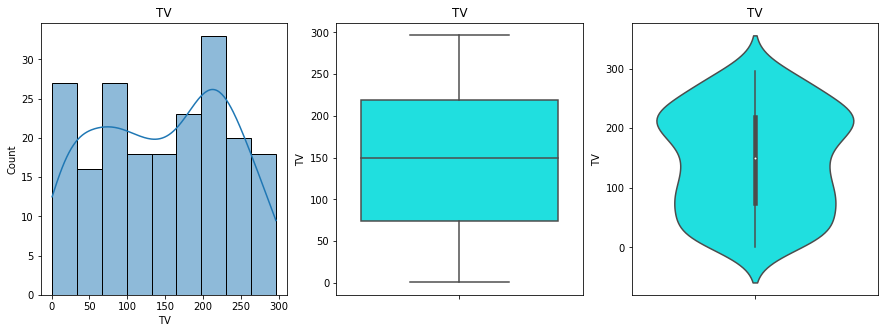

In [39]:
print(df['TV'].describe().round(2))


fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize = (15,5))
sns.histplot(x = 'TV', data = df, kde = True, ax = axes[0])
axes[0].set_title('TV')

sns.boxplot(y = 'TV', data = df, color = 'cyan',ax = axes[1])
axes[1].set_title('TV')

sns.violinplot(y = 'TV', data = df, color = 'cyan',ax = axes[2])
axes[2].set_title('TV')

count    200.00
mean      23.26
std       14.85
min        0.00
25%        9.98
50%       22.90
75%       36.52
max       49.60
Name: Radio, dtype: float64


Text(0.5, 1.0, 'Radio')

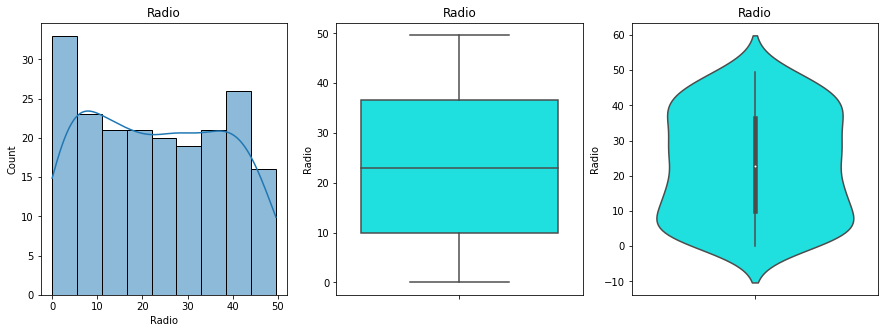

In [40]:
print(df['Radio'].describe().round(2))


fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize = (15,5))
sns.histplot(x = 'Radio', data = df, kde = True, ax = axes[0])
axes[0].set_title('Radio')

sns.boxplot(y = 'Radio', data = df, color = 'cyan',ax = axes[1])
axes[1].set_title('Radio')

sns.violinplot(y = 'Radio', data = df, color = 'cyan',ax = axes[2])
axes[2].set_title('Radio')

count    200.00
mean      30.55
std       21.78
min        0.30
25%       12.75
50%       25.75
75%       45.10
max      114.00
Name: Newspaper, dtype: float64


Text(0.5, 1.0, 'Newspaper')

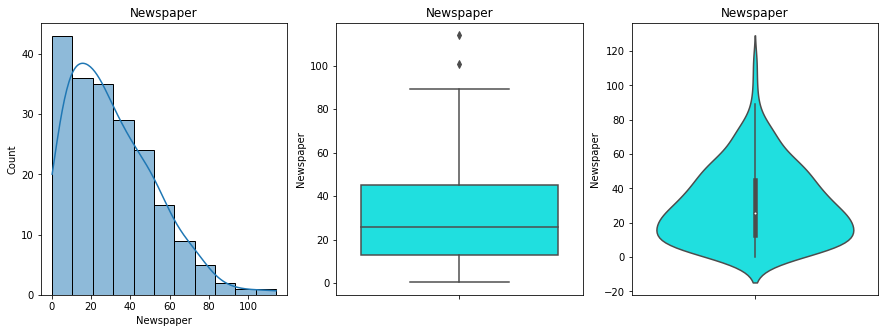

In [42]:
print(df['Newspaper'].describe().round(2))


fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize = (15,5))
sns.histplot(x = 'Newspaper', data = df, kde = True, ax = axes[0])
axes[0].set_title('Newspaper')

sns.boxplot(y = 'Newspaper', data = df, color = 'cyan',ax = axes[1])
axes[1].set_title('Newspaper')

sns.violinplot(y = 'Newspaper', data = df, color = 'cyan',ax = axes[2])
axes[2].set_title('Newspaper')

Text(0.5, 1.0, 'Radio Spent')

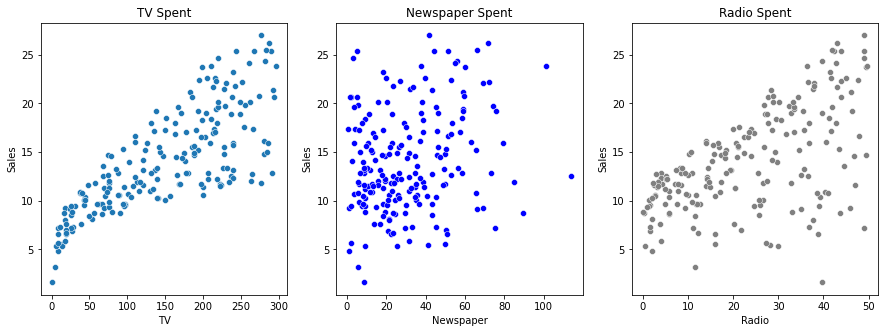

In [46]:
# Bi variate 

fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize = (15,5))
sns.scatterplot(x = 'TV',y = 'Sales' ,data = df,  ax = axes[0])
axes[0].set_title('TV Spent')

sns.scatterplot(x = 'Newspaper', y = 'Sales',data = df, color = 'blue',ax = axes[1])
axes[1].set_title('Newspaper Spent')

sns.scatterplot(x = 'Radio',y = 'Sales', data = df, color = 'gray',ax = axes[2])
axes[2].set_title('Radio Spent')

<AxesSubplot:>

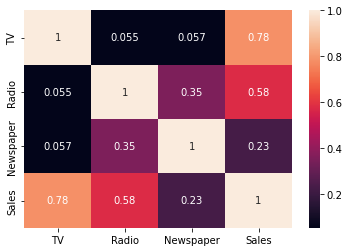

In [47]:
sns.heatmap(df.corr(), annot=True)

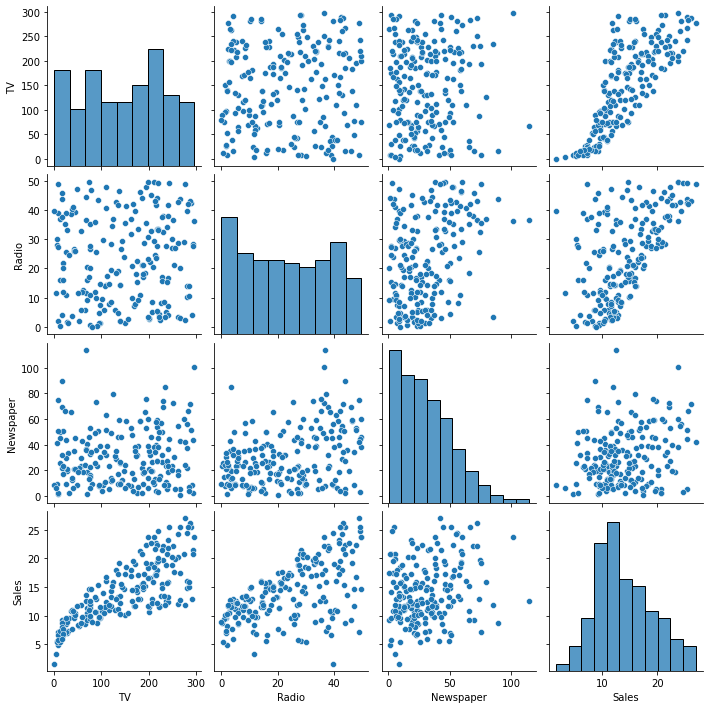

In [48]:
sns.pairplot(df)

In [49]:
X = df.drop(columns = ['Sales'])
y = df['Sales']

In [50]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [51]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=4)

In [54]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(150, 3)
(150,)
(50, 3)
(150,)


In [56]:
Lin_model = LinearRegression()

In [57]:
Lin_model.fit(X_train, y_train)

LinearRegression()

In [59]:
test_prediction = Lin_model.predict(X_test)
train_prediction = Lin_model.predict(X_train)

In [73]:
test_score = r2_score(y_test , test_prediction)
print('Test Score:' , test_score)

train_score = r2_score(y_train, train_prediction)
print('Train Score:' , train_score)

Test Score: 0.9157191830180073
Train Score: 0.8893590351773576


In [74]:
# HIgh variance(overftting issues)

In [78]:
print(df['Sales'].mean())

MAE = mean_absolute_error(y_test , test_prediction)
print('Mean Abs Value: ', MAE)

MSE = mean_squared_error(y_test , test_prediction)
print('Mean Squared Value: ', MSE)

print('RMSE :',np.sqrt(MSE))

14.022500000000003
Mean Abs Value:  1.1532385280495927
Mean Squared Value:  2.0906416277008053
RMSE : 1.4459051240315892


In [79]:
test_residual = y_test - test_prediction

<AxesSubplot:xlabel='Sales', ylabel='Count'>

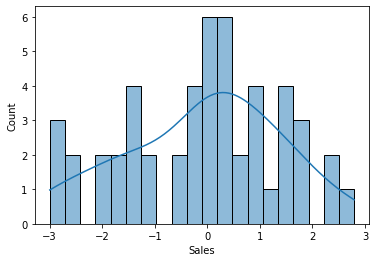

In [81]:
sns.histplot(x = test_residual,kde = True, bins = 20)

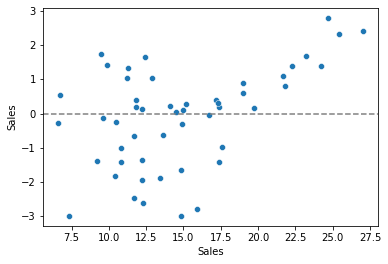

In [87]:
    sns.scatterplot(x = y_test, y = test_residual)
    plt.axhline(y = 0, color = 'gray',ls = '--')

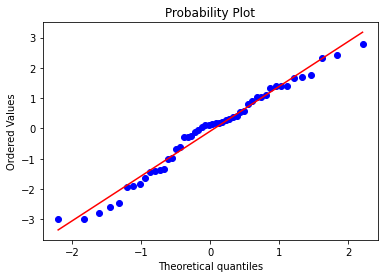

In [97]:
fig, ax = plt.subplots()
_ = sp.stats.probplot(test_residual, plot = ax, fit=True)

In [98]:
final_model = LinearRegression()

In [99]:
final_model.fit(X,y)

LinearRegression()

In [100]:
final_prediction = final_model.predict(X)

In [108]:
score = r2_score(y , final_prediction)
print('Score:' , score)

Score: 0.8972106381789522


In [102]:
final_residual = y - final_prediction

In [103]:
final_residual

0      1.576026
1     -1.937855
2     -3.007671
3      0.902170
4     -0.288672
         ...   
195    2.229658
196    1.534688
197    0.014079
198    1.732679
199   -1.773196
Name: Sales, Length: 200, dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Count'>

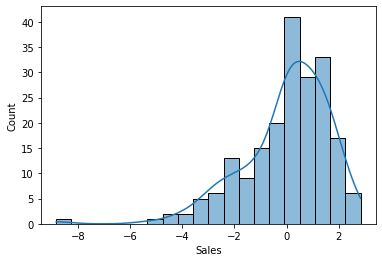

In [104]:
sns.histplot(x = final_residual, bins = 20, kde = True)

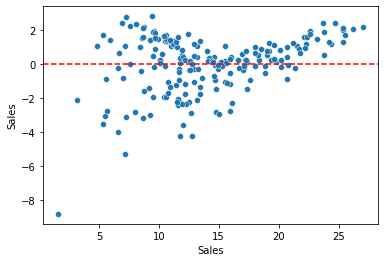

In [106]:
sns.scatterplot(x = y, y = final_residual)
plt.axhline(y = 0, color = 'red', ls= '--')

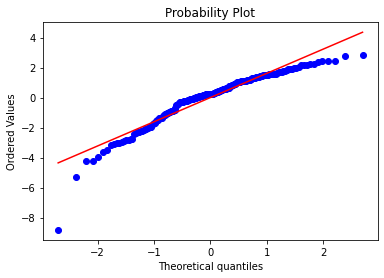

In [107]:
fig, ax = plt.subplots()
_ = sp.stats.probplot(final_residual, plot = ax)

In [111]:
coeff = final_model.coef_
coeff

array([ 0.04576465,  0.18853002, -0.00103749])

In [114]:
Coeff_table = pd.DataFrame(coeff,X.columns, columns = ['Coefficient'])
Coeff_table

,Coefficient
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


In [116]:
X.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [117]:
new_data = [[230,37.8,69.2]]

In [118]:
final_model.predict(new_data)

array([20.51939795])

In [119]:
df.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Sales         22.1
Name: 0, dtype: float64

In [120]:
from joblib import dump, load

In [121]:
dump(final_model,'final.joblib')

['final.joblib']

In [123]:
loaded = load('final.joblib')

In [124]:
loaded.predict(new_data)

array([20.51939795])